<a id='start'></a>
# Riconoscimao la scrittura

Creiamo una rete neurale deeplearning che permetta di riconoscere dei numeri scritti a mano:

In [1]:
# We must always import the relevant libraries for our problem at hand. NumPy and TensorFlow are required for this example.
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

Una volta importato tensorflow, possiamo quindi iniziare a preparare i nostri dati, modellarli e quindi addestrarli. Per semplicità, utilizzeremo il più comune esempio di "ciao mondo" per l'apprendimento approfondito, che è il set di dati mnist. È un insieme di cifre scritte a mano, da 0 a 9. Sono le immagini 28x28 di queste cifre scritte a mano. Mostreremo un esempio di utilizzo di dati esterni, ma, per ora, carichiamo questi dati:

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Quando lavori con i tuoi dati raccolti, è probabile che non siano impacchettato così bene. In questo caso è necessario dedicare un poì di tempo e di impegno in questo passaggio.

Quindi i dati x_train sono le "caratteristiche". In questo caso, le funzionalità sono valori in pixel delle immagini 28x28 di queste cifre 0-9. L'y_train è l'etichetta (è un 0,1,2,3,4,5,6,7,8 o un 9?)

Le varianti di test di queste variabili sono gli esempi "fuori campione" che useremo. Questi sono esempi dai nostri dati che metteremo da parte, riservandoli per testare il modello.

Le reti neurali sono eccezionalmente buone per adattarsi ai dati, al punto che generalmente si adattano troppo ai dati. La nostra vera speranza è che la rete neurale non memorizzi solo i nostri dati e che invece "generalizzi" e impari il vero problema e i modelli ad esso associati.

Diamo un'occhiata a questi dati reali:

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Bene, possiamo povare a visualizzare questa osservazione:

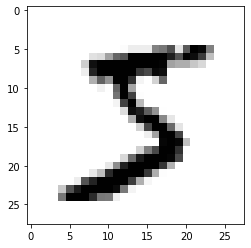

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Generalmente è una buona idea "normalizzare" i tuoi dati. Questo in genere comporta il ridimensionamento dei dati tra 0 e 1, o forse -1 e positivo 1. Nel nostro caso, ogni "pixel" è una caratteristica, e ogni caratteristica attualmente varia da 0 a 255. Non abbastanza da 0 a 1. Facciamo cambiala con una comoda funzione di utilità:

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Ora costruiamo il nostro modello!

In [6]:
model = tf.keras.models.Sequential()

2022-04-05 12:07:34.643821: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Un modello sequenziale è quello che userai la maggior parte del tempo. Usiamolo in questo caso.

Ora dobbiamo inserire tutti gli strati. Ricordi la nostra immagine di rete neurale? Lo strato di input era piatto. Quindi, dobbiamo prendere questa immagine 28x28 e renderla una piatta 1x784. Ci sono molti modi per farlo, ma keras ha uno strato di Flatten creato appositamente per noi, quindi lo useremo.

In [7]:
model.add(tf.keras.layers.Flatten())

Questo servirà come nostro livello di input. Prenderà i dati che gli forniamo e li appiattiremo per noi. Successivamente, vogliamo i nostri livelli nascosti. Andremo con il livello di rete neurale più semplice, che è solo un livello denso. Questo si riferisce al fatto che si tratta di uno strato densamente connesso, il che significa che è "completamente connesso", in cui ogni nodo si collega a ciascun nodo precedente e successivo. Proprio come la nostra immagine.

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Questo strato ha 128 unità. La funzione di attivazione è relu, abbreviazione di linear rettificata. Attualmente, relu è la funzione di attivazione che dovrebbe essere predefinita. Ce ne sono molti altri da verificare, ma, se non sai cosa usare, usa relu per iniziare.

Aggiungiamo un altro livello identico per una buona misura.

In [9]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Ora siamo pronti per un livello di output:

In [10]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Questo è il nostro ultimo livello. Ha 10 nodi. 1 nodo per la previsione del numero possibile. In questo caso, la nostra funzione di attivazione è una funzione softmax, poiché in realtà stiamo davvero cercando qualcosa di più simile a una distribuzione di probabilità di quale delle possibili opzioni di previsione questa cosa che stiamo passando attraverso le caratteristiche di è. Grande, il nostro modello è fatto.

Ora dobbiamo "compilare" il modello. Qui è dove passiamo le impostazioni per ottimizzare / allenare effettivamente il modello che abbiamo definito.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Ricorda perché abbiamo scelto relu come funzione di attivazione? La stessa cosa è vera per l'ottimizzatore Adam. È solo un ottimo default per iniziare.

Successivamente, abbiamo la nostra metrica di perdita. La perdita è un calcolo dell'errore. Una rete neurale in realtà non tenta di massimizzare la precisione. Cerca di minimizzare la perdita. Di nuovo, ci sono molte scelte, ma una qualche forma di crossentropia categoriale è un buon inizio per un compito di classificazione come questo.

Ora, facciamo il fit!

In [12]:
history = model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9206
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1104 - accuracy: 0.9655
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0752 - accuracy: 0.9764
Epoch 4/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0547 - accuracy: 0.9823


Mentre ci alleniamo, possiamo vedere la perdita va giù (yay), e la precisione migliora abbastanza rapidamente al 98-99% (doppio yay!)

Questa è la perdita e l'accuratezza dei dati nel campione. Ottenere un'accuratezza elevata e una perdita bassa potrebbe significare che il tuo modello ha imparato come classificare le cifre in generale (è generalizzato) ... o semplicemente memorizzato ogni singolo esempio che hai mostrato (overfit). Questo è il motivo per cui dobbiamo testare dati fuori campione (dati che non abbiamo usato per addestrare il modello).

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9709
0.10022018104791641
0.9708999991416931


Infine, fai previsioni!

In [14]:
predictions = model.predict(x_test)
predictions

array([[1.21811910e-11, 6.55062493e-08, 6.77902108e-06, ...,
        9.99967813e-01, 1.87341898e-09, 1.64045111e-10],
       [5.72206993e-08, 6.75293559e-04, 9.99316931e-01, ...,
        1.91132873e-10, 3.74358891e-08, 3.98414313e-14],
       [4.30421210e-09, 9.99984860e-01, 5.76044727e-07, ...,
        1.12021980e-05, 2.07159565e-06, 1.69692207e-08],
       ...,
       [9.26482113e-10, 1.02898937e-07, 9.30893229e-09, ...,
        2.34393997e-06, 1.46789077e-07, 1.01596783e-07],
       [2.16303943e-06, 3.25246361e-07, 2.18175629e-07, ...,
        8.43424186e-06, 6.48519606e-04, 6.37423891e-10],
       [8.39571399e-08, 1.28828095e-08, 3.38634065e-10, ...,
        4.91946674e-12, 2.40207632e-10, 2.59821921e-11]], dtype=float32)

Quel certo non inizia come utile, ma ricorda che queste sono distribuzioni di probabilità. Possiamo ottenere il numero reale semplicemente:

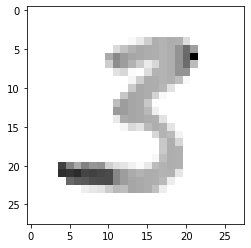

Il nostro algoritmo legge il numero 3


In [15]:
import numpy as np

case_id = 4242

plt.imshow(x_test[case_id], cmap=plt.cm.binary)
plt.show()

print("Il nostro algoritmo legge il numero %d" % np.argmax(predictions[case_id]))

Anche in questo caso proviamo a ricosturire la stessa rete utilizzando pyTorch invece che TensorFlow:

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#build model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=128)
        self.output = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x
        
net = Net()
print(net)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

x_train = torch.FloatTensor([torch.flatten(e).tolist() for e in x_train])
x_test = torch.FloatTensor([torch.flatten(e).tolist() for e in x_test])

In [20]:
# train the network
num_epoch = 6
history = { 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': [] }

for epoch in range(num_epoch):
    y_hat = net.forward(x_train)
    with torch.no_grad():
        y_test_hat = net.forward(x_test)
        
    loss = criterion(y_hat, y_train)
    y_out = torch.FloatTensor([z.tolist().index(max(z)) for z in y_hat])
    acc = torch.sum(y_out == y_train).double() / len(y_train)
    
    val_loss = criterion(y_test_hat, y_test)
    y_test_out = torch.FloatTensor([z.tolist().index(max(z)) for z in y_test_hat])
    val_acc = torch.sum(y_test_out == y_test).double() / len(y_test)
    
    history['loss'].append(loss.detach().numpy())
    history['accuracy'].append(acc.detach().numpy())
    history['val_loss'].append(val_loss.detach().numpy())
    history['val_accuracy'].append(val_acc.detach().numpy())
 
    print('Epoch: %d - loss: %1.4f - accuracy: %1.4f - val_loss: %1.4f - val_accuracy: %1.4f' % (epoch, loss, acc, val_loss, val_acc))
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 - loss: 0.6663 - accuracy: 0.8081 - val_loss: 0.6590 - val_accuracy: 0.8183
Epoch: 1 - loss: 0.6524 - accuracy: 0.7820 - val_loss: 0.6398 - val_accuracy: 0.7932
Epoch: 2 - loss: 0.7116 - accuracy: 0.7735 - val_loss: 0.7087 - val_accuracy: 0.7817
Epoch: 3 - loss: 0.5577 - accuracy: 0.8316 - val_loss: 0.5549 - val_accuracy: 0.8400
Epoch: 4 - loss: 0.6339 - accuracy: 0.7956 - val_loss: 0.6325 - val_accuracy: 0.8014
Epoch: 5 - loss: 0.5012 - accuracy: 0.8546 - val_loss: 0.4972 - val_accuracy: 0.8619


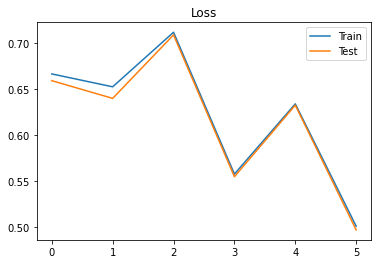

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()

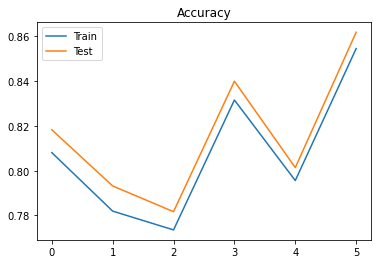

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['Train', 'Test'])
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

preds = []
with torch.no_grad():
    for val in x_test:
        y_hat = net.forward(val)
        preds.append(y_hat.argmax().item())

accuracy_score(y_test, preds)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.8529

In [24]:
with torch.no_grad():
    torch_predictions = net(x_test)
torch_predictions

tensor([[ -1.2353, -11.6494,  -5.2658,  ...,  15.7789,   0.8300,   5.6694],
        [ -3.4930,   0.4727,  13.6013,  ..., -13.7438,   1.7883, -16.1630],
        [ -7.7321,  10.1465,   1.3694,  ...,  -3.2291,   0.8346,  -4.2883],
        ...,
        [ -9.1121,  -5.4487,  -6.1232,  ...,   3.7345,   1.9974,   8.6606],
        [  2.5666,  -6.5138,  -1.4061,  ...,  -3.5787,   5.9282,  -3.1643],
        [  3.5544, -11.1487,   4.9993,  ...,  -8.9305,  -3.6077,  -6.7259]])

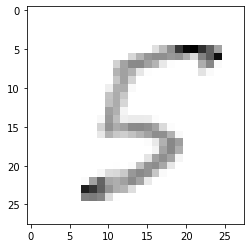

Il nostro algoritmo legge il numero 5


In [25]:
import numpy as np

case_id = 23

plt.imshow(torch.reshape(x_test[case_id], (28, 28)), cmap=plt.cm.binary)
plt.show()

print("Il nostro algoritmo legge il numero %d" % np.argmax(torch_predictions[case_id]))

Eccezionale!
Con questo esempio abbiamo appena scalfito la superficie di ciò che si può fare con queste librerie.
Puoi trovare maggiore documentazione qui:
- [Tensorflow](https://www.tensorflow.org/api_docs/python/)
- [Keras](https://keras.io/layers/about-keras-layers/)
- [pyTorch](https://pytorch.org/docs/stable/index.html)

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>